In [6]:
!pip install -r requirements.txt

  Using cached pygame-2.1.2-cp39-cp39-win_amd64.whl (8.4 MB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=e527c46ee3433255b93a359f982a0efb7d23000937c6eb44ec597a91b2c4c980
  Stored in directory: c:\users\jairo\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=4fd93759cfd36d1e90961db1501b66e41fa2ec92a8c6b1fbf2fbd379fc8dbb58
  Stored in directory: c:\users\jairo\appdata\local\pip\cache\wheels\0c\09\9e\49e21a6840ef7955b06d47394afef0058f0378c0914e48b8b8
Successfully built termcolor pyperclip


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers

In [2]:
df = pd.read_csv('log/episode_log.csv')

In [3]:
df.head()

,score,episode reward,running reward,episode frames,total frames,Q values
0,130,44,44.0,165,165,7.711532
1,130,44,44.0,265,430,8.760769
2,320,80,56.0,497,927,9.334431
3,280,80,62.0,570,1497,9.716899
4,80,32,56.0,262,1759,10.043714


### Mean Q State-Action values

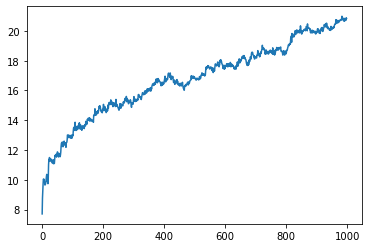

In [10]:
plt.plot(df['Q values'])

### Mean Score over last 100 episodes

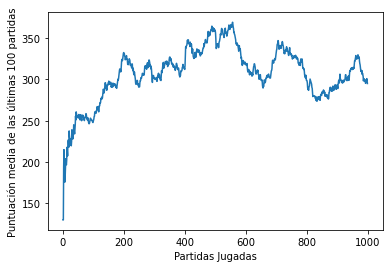

In [11]:
mean_score = 0
scores = []
running_reward = []
for i in df['score']:
    scores.append(i)
    if len(scores) > 100:
        del scores[0]
    
    mean_reward = np.mean(scores)
    running_reward.append(mean_reward)

plt.xlabel('Partidas Jugadas')
plt.ylabel('Puntuación media de las últimas 100 partidas')
plt.plot(running_reward)
plt.savefig('Data/early_training_score')

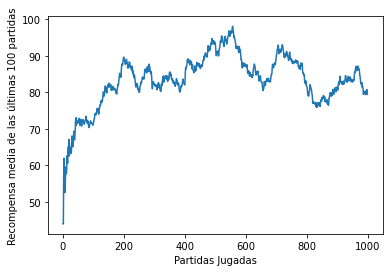

In [12]:
mean_score = 0
scores = []
running_reward = []
for i in df['episode reward']:
    scores.append(i)
    if len(scores) > 100:
        del scores[0]
    
    mean_reward = np.mean(scores)
    running_reward.append(mean_reward)

plt.xlabel('Partidas Jugadas')
plt.ylabel('Recompensa media de las últimas 100 partidas')
plt.plot(running_reward)

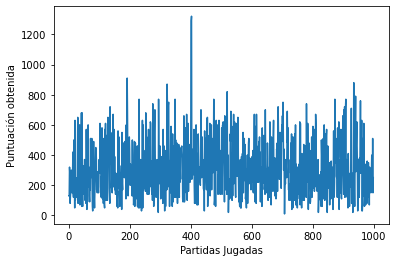

In [13]:
plt.plot(df['score'])
plt.xlabel('Partidas Jugadas')
plt.ylabel('Puntuación obtenida')
plt.savefig('Data/early_training_score')

### Mean frames per episode over last 100 episodes

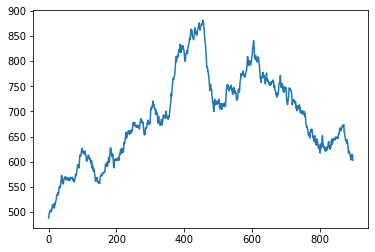

In [14]:
mean_frames = 0
frames = []
last_frames = []
for i in df['episode frames']:
    frames.append(i)
    if len(frames) > 100:
        del frames[0]
    
    mean_frames = np.mean(frames)
    last_frames.append(mean_frames)
    
plt.plot(last_frames[100:])

In [10]:
inputs = layers.Input((84, 84, 4,))

# 3 convolutional layers
layer1 = layers.Conv2D(32, (8, 8), strides=4, activation='relu')(inputs)
layer2 = layers.Conv2D(64, (4, 4), strides=2, activation='relu')(layer1)
layer3 = layers.Conv2D(64, (3, 3), strides=1, activation='relu')(layer2)

# Flatten the output of the convolutional layers
flatten = layers.Flatten()(layer3)

# Fully connected layer
layer5 = layers.Dense(512, activation='relu')(flatten)

# Output layer
output = layers.Dense(6, activation='linear')(layer5)

model = keras.Model(inputs=inputs, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 84, 84, 4)]       0         
                                                                 
 conv2d (Conv2D)             (None, 20, 20, 32)        8224      
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          32832     
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 512)               1606144   
                                                                 
 dense_1 (Dense)             (None, 6)                 3078  